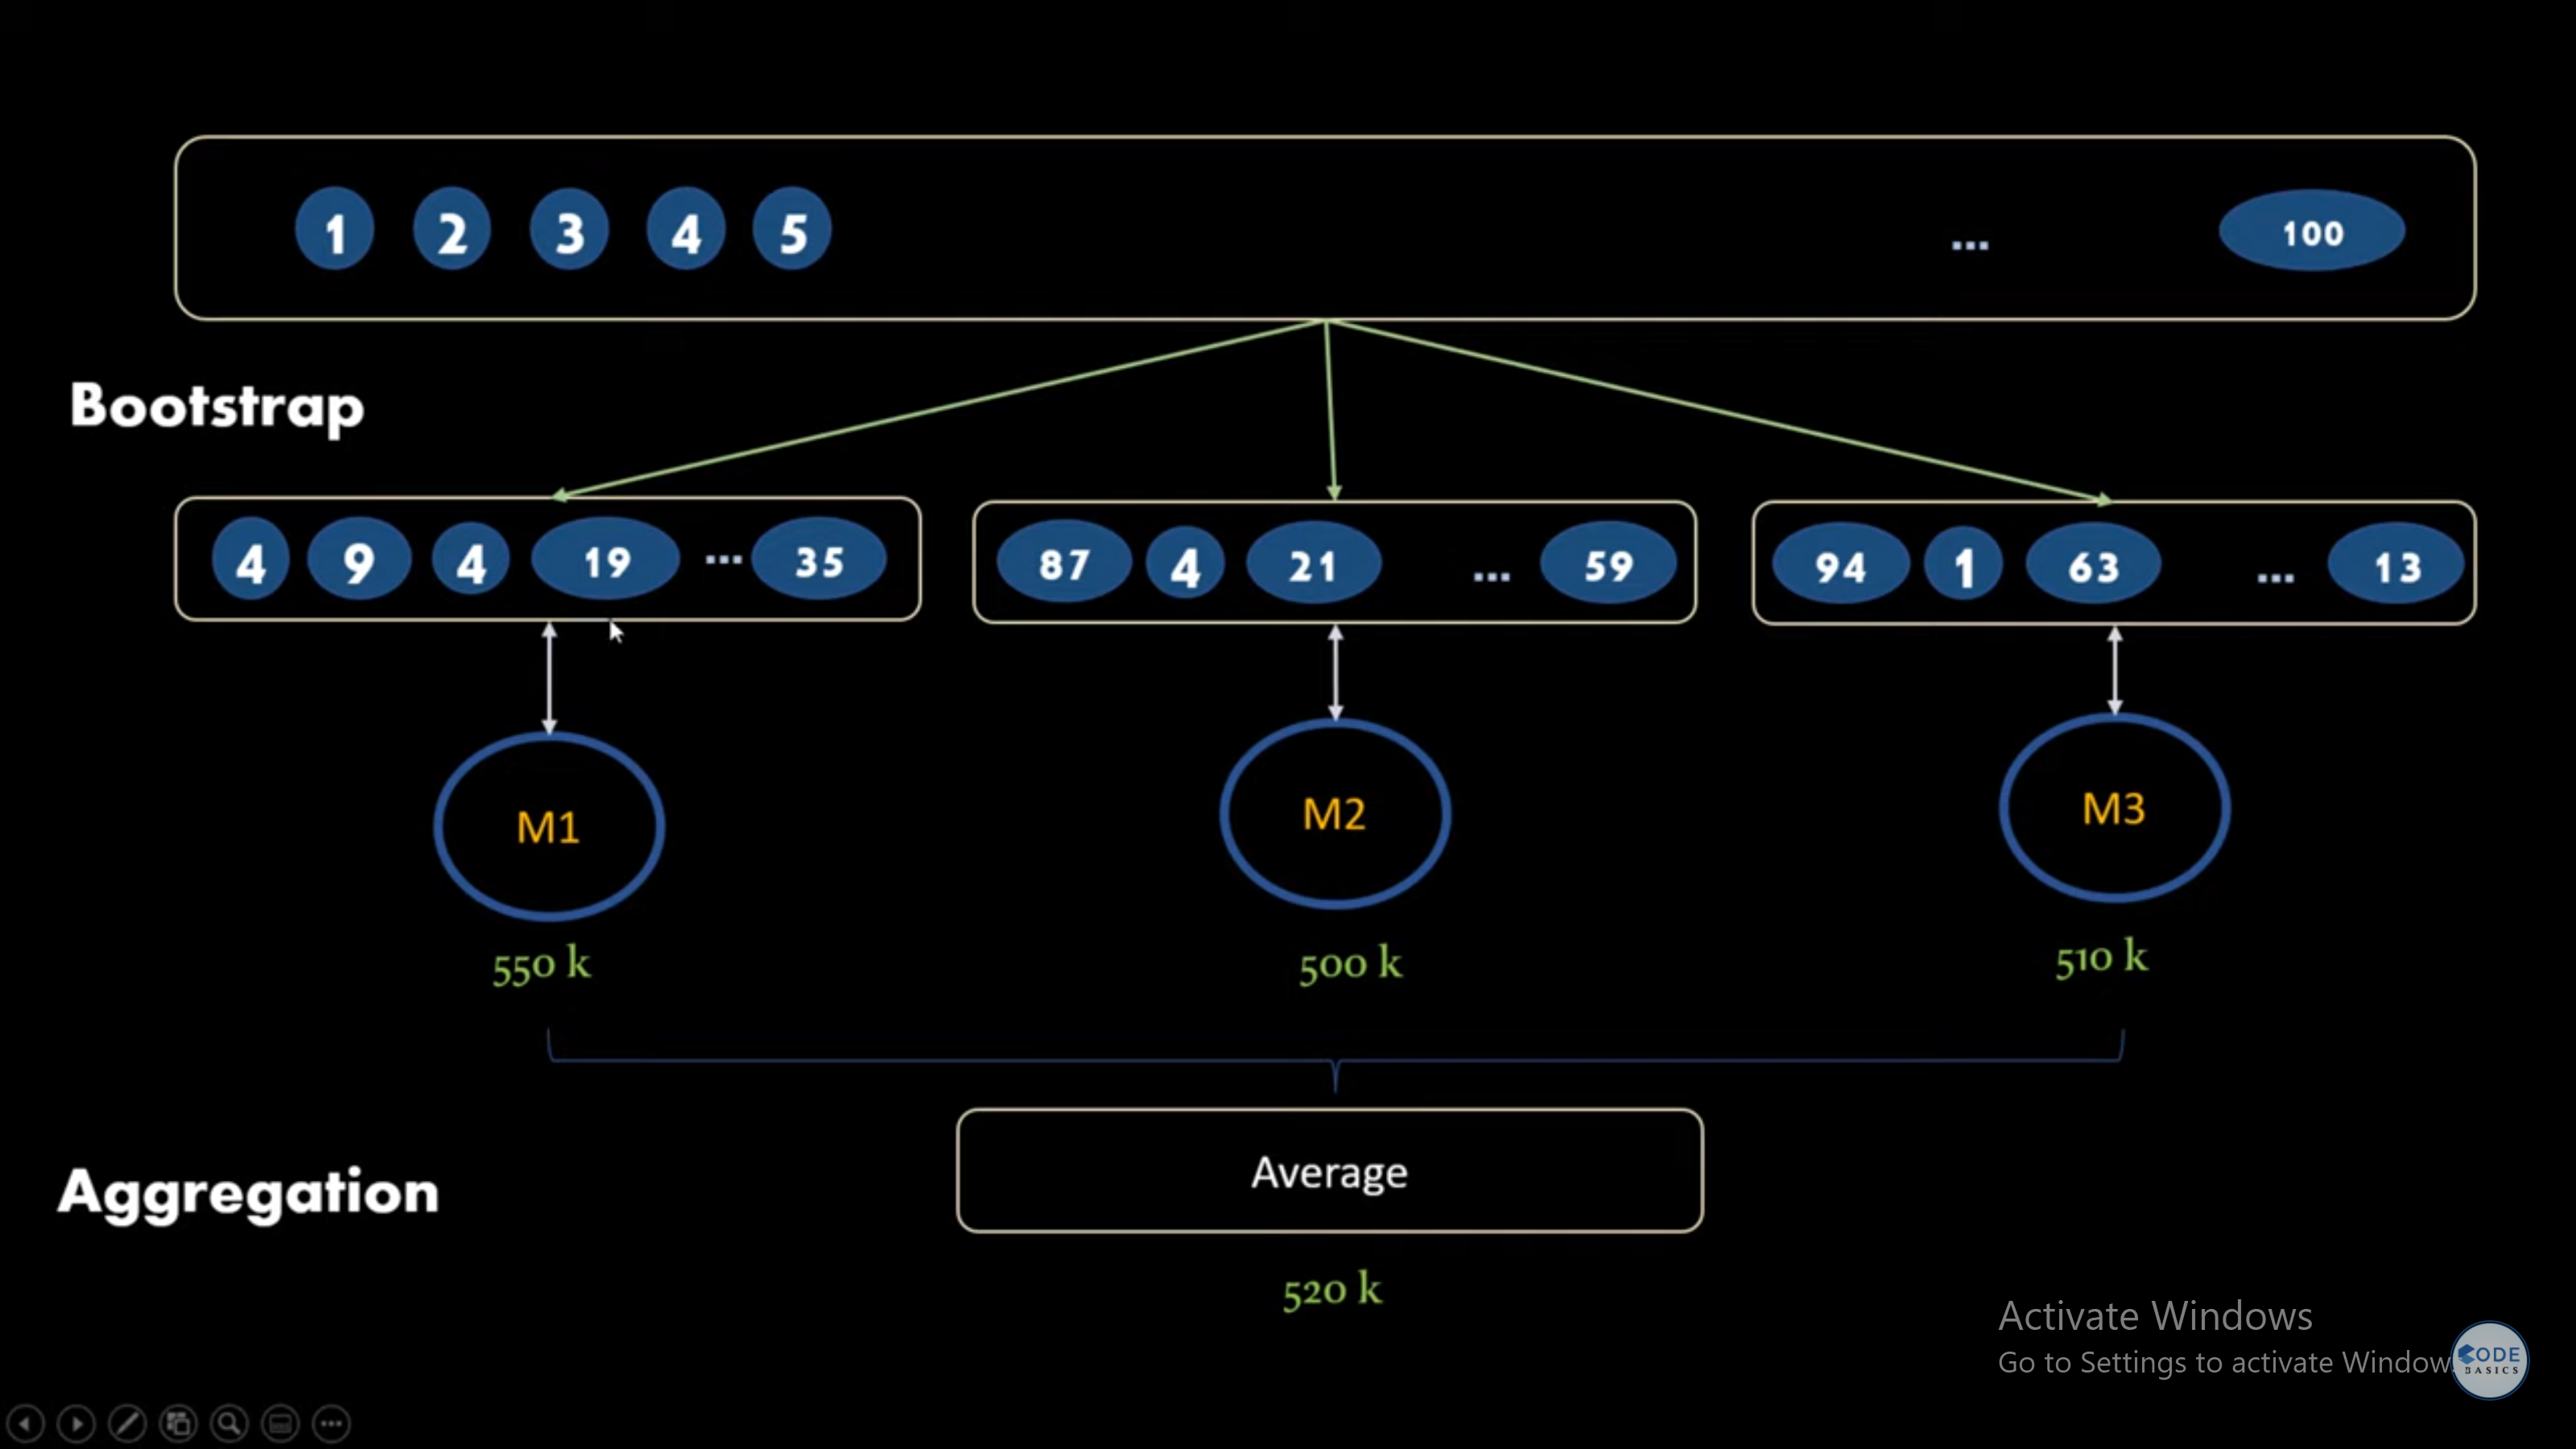



> Perbedaan dengan Random Forest yaitu Teknik Bagging juga memilih fitur(features) secara acak tidak hanya data aja

### **Bagging :**

Underlying model can be anything (SVM, knn, Logistic Regression, etc)

### **Bagged Trees :**

Each model is a tree (Setiap model yang dilatih adalah pohon)

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
1. Convert text columns to numbers using label encoding and one hot encoding
1. Apply scaling
1. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
1. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
1. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
df.shape

(918, 12)

## **Clearing Data (Buang Outlier)**

In [6]:
df[df.Age>(df.Age.mean()+3*df.Age.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [7]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [10]:
df1 = df[df.RestingBP<=(df.RestingBP.mean()+3*df.RestingBP.std())]
df1.shape #tanpa outlier RestingBP

(911, 12)

In [14]:
df1[df1.Cholesterol>(df1.Cholesterol.mean() + 3*df1.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [16]:
df2 = df1[df1.Cholesterol<=(df1.Cholesterol.mean() + 3*df1.Cholesterol.std())]
df2.shape

(908, 12)

In [17]:
df2[df2.MaxHR>(df2.MaxHR.mean() + 3*df2.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [18]:
df2[df2.Oldpeak>(df2.Oldpeak.mean() + 3*df2.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [19]:
df3 = df2[df2.Oldpeak<=(df2.Oldpeak.mean() + 3*df2.Oldpeak.std())]
df3.shape

(902, 12)

In [23]:
# prompt: import labelencoder

from sklearn.preprocessing import LabelEncoder


In [20]:
dummies = pd.get_dummies(df3['Sex'])
df3_dummies = pd.concat([df3, dummies], axis=1)
df3_dummies

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True,False
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,False,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True,False
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,False,True
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,False,True
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,False,True
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,True,False


In [21]:
data_final = df3_dummies.drop(['Sex'], axis=1)
data_final

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,True
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True,False
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,False,True
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True,False
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,False,True
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,False,True
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,False,True
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,True,False


In [27]:
data_final.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [26]:
le = LabelEncoder()

In [38]:
data_final['ChestPainType'] = le.fit_transform(data_final['ChestPainType'])
data_final['RestingECG'] = le.fit_transform(data_final['RestingECG'])
data_final['ExerciseAngina'] = le.fit_transform(data_final['ExerciseAngina'])
data_final['ST_Slope'] = le.fit_transform(data_final['ST_Slope'])

data_final.head()




,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,False,True
1,49,2,160,180,0,1,156,0,1.0,1,1,True,False
2,37,1,130,283,0,2,98,0,0.0,2,0,False,True
3,48,0,138,214,0,1,108,1,1.5,1,1,True,False
4,54,2,150,195,0,1,122,0,0.0,2,0,False,True


In [35]:
# prompt: import scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [39]:
X = data_final.drop('HeartDisease', axis=1)
y = data_final.HeartDisease

In [40]:
# prompt: use scaler

X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.42896269,  0.22498958,  0.46089071, ...,  1.0456339 ,
        -0.51485643,  0.51485643],
       [-0.47545956,  1.27107517,  1.5925728 , ..., -0.62072967,
         1.94228905, -1.94228905],
       [-1.74679706,  0.22498958, -0.10495034, ...,  1.0456339 ,
        -0.51485643,  0.51485643],
       ...,
       [ 0.37209878, -0.82109601, -0.10495034, ..., -0.62072967,
        -0.51485643,  0.51485643],
       [ 0.37209878,  0.22498958, -0.10495034, ..., -0.62072967,
         1.94228905, -1.94228905],
       [-1.64085227,  1.27107517,  0.3477225 , ...,  1.0456339 ,
        -0.51485643,  0.51485643]])

In [41]:
# prompt: import train test split

from sklearn.model_selection import train_test_split

In [44]:
y.value_counts()

,count
HeartDisease,
1,495
0,407


In [47]:
# prompt: use traintestsplit

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [50]:
X.shape

(902, 12)

### *Without Bagging*

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(), X_train, y_train, cv=5)
scores.mean()

0.8709961685823755

### *With Bagging*

In [63]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator = SVC(),
    n_estimators = 100, #berapa banyak subkelompok kumpulan data
    max_samples = 0.8, #max data dalma subkelompok
    oob_score = True, #Nilai yang tidak termasuk dalam subkelompok akan dijadikan sebagai data train dan dinilai akurasinya
    random_state=0
)

bag_model.fit(X_train, y_train)
bag_model.oob_score_ #0.8737864077669902

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8737864077669902

In [57]:
bag_model.score(X_test, y_test)
#0.8839779005524862

0.8839779005524862

### *Without Bagging*

In [61]:
# prompt: import decision tree classifier , hitung score nya juga

from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
scores.mean()
#0.7808620689655171

0.7808620689655171

### *With Bagging*

In [60]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100, #berapa banyak subkelompok kumpulan data
    max_samples = 0.8, #max data dalma subkelompok
    oob_score = True, #Nilai yang tidak termasuk dalam subkelompok akan dijadikan sebagai data train dan dinilai akurasinya
    random_state=0
)

bag_model.fit(X_train, y_train)
bag_model.oob_score_ #0.8585298196948682

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8585298196948682

### *Without Bagging RandomForestClassifier*

In [62]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
scores.mean() #0.8696264367816091

0.8696264367816091

RandomForestClassifier memberikan performa yang lebih baik dengan skor 86,9%. Di bawahnya, digunakan bagging di mana ia mengambil sampel tidak hanya baris data tetapi juga kolom (atau fitur)